<a href="https://colab.research.google.com/github/Nsrddgzll/Regression-modelling/blob/main/Linear_regregression_representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optional Lab: Model Representation

<figure>
 <img src="https://github.com/TurboNeso/Testrepo/blob/main/images/C1_W1_L3_S1_Lecture_b.png?raw=1"   style="width:600px;height:200px;">
</figure>


##Goals
In this lab we will explore:
- to implement the model $f_{w, b}$ for linear regression with one variable

## Notation
Here is a summary of some of the notation will use.  

|General <img width=70/> <br />  Notation  <img width=70/> | Description<img width=350/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                      ||
| **Regression** |         |    |     |
|  $\mathbf{x}$ | Training Example feature values (in this lab - Size (1000 sqft))  | `x_train` |   
|  $\mathbf{y}$  | Training Example  targets (in this lab Price (1000s of dollars))  | `y_train`
|  $x^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `x_i`, `y_i`|
| m | Number of training examples | `m`|
|  $w$  |  parameter: weight                                 | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` |

## Tools
In this lab we will utilize:
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy

# Problem Statement
<img align="left" src="https://github.com/TurboNeso/Testrepo/blob/main/images/C1_W1_L3_S1_trainingdata.png?raw=1"    style=" width:380px; padding: 10px;  " />

we will use example of housing price prediction.  
This lab will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000. These two points will constitute our *data or training set*. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

We would like to fit a linear regression model (shown above as the blue straight line) through these two points, so we can then predict price for other houses - say, a house with 1200 sqft.

let's run the following code cell to create our x_train and y_train variables. The data is stored in one-dimensional NumPy arrays.

In [2]:
# x_train is the input variable ( size in 1000 square feet)
# y_train is the target ( price in 1000's of dollars)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f'x_train = {x_train}')
print(f'y_train = {y_train}')

x_train = [1. 2.]
y_train = [300. 500.]


### Number of training examples `m`
we will use `m` to denote the number of training examples. Numpy arrays have a `.shape` parameter. `x_train.shape` returns a python tuple with an entry for each dimension. `x_train.shape[0]` is the length of the array and number of examples as shown below.

In [3]:
# m is the number of training examples
print(f'x_train.shape: {x_train.shape}')
m = x_train.shape[0]
print(f'number of training examples is {m} ')

x_train.shape: (2,)
number of training examples is 2 


In [4]:
# Function to calculate the cost
def compute_cost(x, y, w, b):

  """
  Function to calcuate the cost
  Arguments:
    x: training example of feature values
    y: training example of target values
    w: parameter (wight)
    b: parameter (bias)
  """
  # Initialize the cost
  cost = 0
  # get the namber of traning examples
  m = x.shape[0]
  # loop through  the number of training examples
  for i in range(m):
    f_wb = w*x[i] +b
    cost = cost + (f_wb - y[i])**2
  total_cost = cost / 2*m
  return total_cost

let's calculate to cost using arbitrary parameters, such as zeros

In [6]:
w_in = 0
b_in = 0
compute_cost(x_train, y_train, w_in, b_in)

340000.0

<a name="toc_40291_2.2"></a>
## Implement Gradient Descent
We will implement gradient descent algorithm for one feature. We will need three functions.
- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` implementing equation (2) above (code from previous lab)
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.


In [7]:
def compute_gradient(x, y, w, b):
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0
  for i in range(m):
    f_wb = w*x[i] + b
    dj_dw_i = (f_wb - y[i])*x[i]
    dj_db_i = (f_wb - y[i])
    dj_dw =+ dj_dw_i
    dj_db =+ dj_db_i
  dj_dw = dj_dw/m
  dj_db = dj_db/m
  return dj_dw, dj_db

In [8]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
  # an array to store cost J and w's at each iteration primarily for graphing later
  J_history = []
  p_history = []
  b = b_in
  w = w_in

  for i in range(num_iters):
    # Calculate the gradient and update the parameters using gradient_function
    dj_dw, dj_db = gradient_function(x, y, w, b)

    # Update Parameters using equation (3) above
    w = w - alpha*dj_dw
    b = b - alpha*dj_db

    # Save cost J at each iteration
    if i < 100000:
      J_history.append(cost_function(x, y, w, b))
      p_history.append([w,b])
     # Print cost every at intervals 10 times or as many iterations if < 10
    if i% math.ceil(num_iters/10) == 0:
       print(f'Iteration{i:4}: Cost{J_history[-1]:0.2e}',
       f'dj_dw: {dj_dw:0.3e} , dj_db: {dj_db:0.3e}',
       f'w: {w:0.3e}, b: {b:0.5e}')
  return w, b, J_history, p_history





In [9]:
# Initialize parameters
w_init = 0
b_init = 0

# Some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2

# Run the Gradient Decent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations,compute_cost, compute_gradient)
print(f'(w,b) found by gradient descent: {w_final:8.4f}, {b_final:8.4f}')


Iteration   0: Cost3.23e+05 dj_dw: -5.000e+02 , dj_db: -2.500e+02 w: 5.000e+00, b: 2.50000e+00
Iteration1000: Cost3.30e-17 dj_dw: -5.054e-09 , dj_db: -2.527e-09 w: 2.000e+02, b: 1.00000e+02
Iteration2000: Cost2.75e-24 dj_dw: -1.421e-12 , dj_db: -7.105e-13 w: 2.000e+02, b: 1.00000e+02
Iteration3000: Cost2.75e-24 dj_dw: -1.421e-12 , dj_db: -7.105e-13 w: 2.000e+02, b: 1.00000e+02
Iteration4000: Cost2.75e-24 dj_dw: -1.421e-12 , dj_db: -7.105e-13 w: 2.000e+02, b: 1.00000e+02
Iteration5000: Cost2.75e-24 dj_dw: -1.421e-12 , dj_db: -7.105e-13 w: 2.000e+02, b: 1.00000e+02
Iteration6000: Cost2.75e-24 dj_dw: -1.421e-12 , dj_db: -7.105e-13 w: 2.000e+02, b: 1.00000e+02
Iteration7000: Cost2.75e-24 dj_dw: -1.421e-12 , dj_db: -7.105e-13 w: 2.000e+02, b: 1.00000e+02
Iteration8000: Cost2.75e-24 dj_dw: -1.421e-12 , dj_db: -7.105e-13 w: 2.000e+02, b: 1.00000e+02
Iteration9000: Cost2.75e-24 dj_dw: -1.421e-12 , dj_db: -7.105e-13 w: 2.000e+02, b: 1.00000e+02
(w,b) found by gradient descent: 200.0000, 100.000

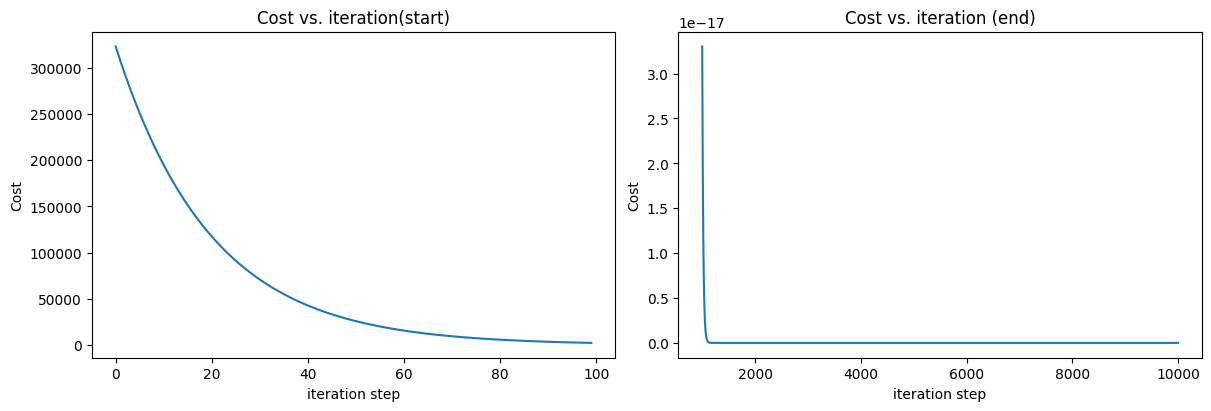

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()
